In [1]:
#Import necessary files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data
data = pd.read_csv(r'C:\Users\Atrey\Documents\USA_Housing.csv')

#View first 5 records
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<AxesSubplot:>

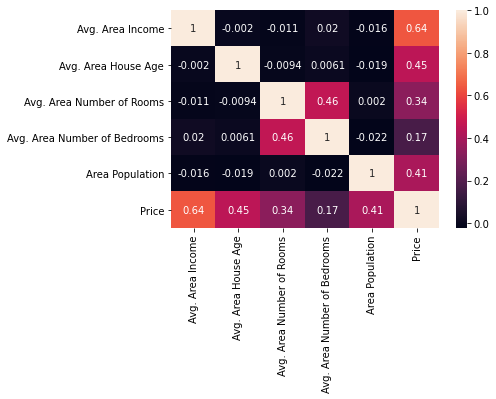

In [3]:
#Develop correlation heatmap 
sns.heatmap(data.corr(), annot=True)

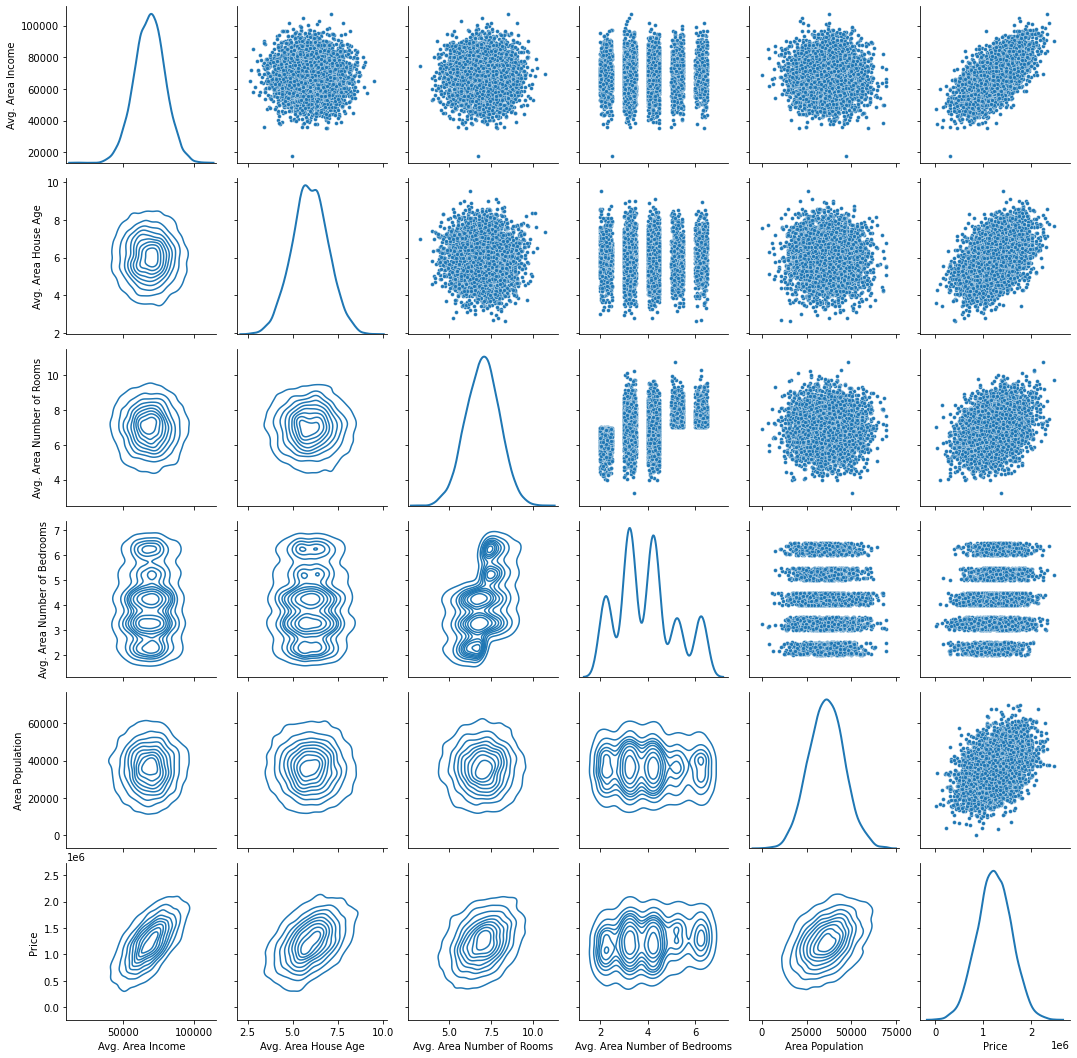

In [4]:
#Generate summary plots of data
g = sns.PairGrid(data, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [43]:
#Understand desrcitptive statistics of dataset
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [44]:
#Check for null values
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [45]:
#Get X and Y targets
x = data.loc[:,'Avg. Area Income':'Area Population']
x = x.astype(int)
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545,5,7,4,23086
1,79248,6,6,3,40173
2,61287,5,8,5,36882
3,63345,7,5,3,34310
4,59982,5,7,4,26354
...,...,...,...,...,...
4995,60567,7,6,3,22837
4996,78491,6,6,4,25616
4997,63390,7,4,2,33266
4998,68001,5,7,5,42625


In [46]:
#Isolate response variable and convert to integer
y = data.loc[:,'Price']
y = y.astype(int)
y

0       1059033
1       1505890
2       1058987
3       1260616
4        630943
         ...   
4995    1060193
4996    1482617
4997    1030729
4998    1198656
4999    1298950
Name: Price, Length: 5000, dtype: int32

In [47]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
#Initialize regressor for regression analysis
regressor = LinearRegression()

In [49]:
#begin model fitting of training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
#accuracy score of train set
regressor.score(X_train, y_train)

0.893967423889695

In [51]:
#accuracy score of test set
regressor.score(X_test, y_test)

0.8902848199906943

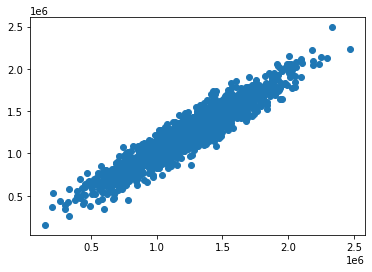

In [52]:
#Display correlation between predicted vs test sets 
predicted = regressor.predict(X_test)
plt.scatter(y_test, predicted)

In [53]:
#Print RMSE of correlation above
print(np.sqrt(mean_squared_error(y_test, predicted)))

114729.22053996654


116027.09522308125


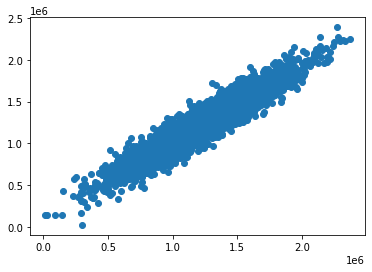

In [54]:
#Print RMSE and display correlation of traininng sets
predicted = regressor.predict(X_train)
plt.scatter(y_train, predicted)
print(np.sqrt(mean_squared_error(y_train, predicted)))

 # A full overview and analysis of the results can be read in the following article I published in Towards Data Science:
https://towardsdatascience.com/deploying-machine-learning-models-into-a-website-using-flask-8582b7ce8802